In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
pip install --upgrade feature engine

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement feature (from versions: none)
ERROR: No matching distribution found for feature


In [3]:
from feature_engine.discretisation import EqualWidthDiscretiser

In [4]:
data = pd.read_csv('BostonHousing.csv')

In [5]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('medv',axis=1),data['medv'],test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((354, 13), (152, 13))

# گسسته سازی با بخشهای مساوی و کتابخانه Pandas:

In [7]:
# ابتدا محدوده مقادیر متغیر را پیدا کنیم
lstat_range= x_train['lstat'].max() - x_train['lstat'].min()
lstat_range

35.25

In [8]:
# سپس محدوده را به ده بخش با عرض مساوی تقسیم کنیم
lstat_range / 10

3.525

In [9]:
# حالا مرزهای بالا و پایین را به دست بیاوریم
min_value = int(np.floor(x_train['lstat'].min()))
max_value = int(np.ceil(x_train['lstat'].max()))
inter_width = int(lstat_range/10)
inter_width, min_value, max_value

(3, 1, 37)

In [10]:
# ساختن لیستی از نقاط تقسیم (بین‌ها) با فاصله‌های مساوی
intervals = [i for i in range(min_value,max_value+inter_width,inter_width)]
intervals

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [11]:
#گسسته سازی ستون lstat
x_train['lstat_disc']=pd.cut(x=x_train['lstat'], bins=intervals, include_lowest=True)
x_test['lstat_disc']=pd.cut(x=x_test['lstat'], bins=intervals, include_lowest=True)
print(x_train[['lstat', 'lstat_disc']].head(10))

     lstat    lstat_disc
141  34.41  (34.0, 37.0]
272   7.73   (7.0, 10.0]
135  16.96  (16.0, 19.0]
298   4.97    (4.0, 7.0]
122  17.93  (16.0, 19.0]
22   18.72  (16.0, 19.0]
68   13.09  (13.0, 16.0]
20   21.02  (19.0, 22.0]
437  26.45  (25.0, 28.0]
14   10.26  (10.0, 13.0]


In [12]:
#نمایش تعداد نمونه‌هایی که در هر بازه قرار میگیرد
x_train['lstat_disc'].value_counts()

lstat_disc
(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(16.0, 19.0]    45
(13.0, 16.0]    44
(0.999, 4.0]    28
(19.0, 22.0]    21
(22.0, 25.0]    17
(28.0, 31.0]     9
(25.0, 28.0]     7
(34.0, 37.0]     4
(31.0, 34.0]     0
Name: count, dtype: int64

C:\Users\Sharif\AppData\Local\Temp\ipykernel_4720\3679566660.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x_train.groupby('lstat_disc')['lstat'].count().plot.bar()


Text(0, 0.5, 'تعداد نمونه\u200cها در هر بین')

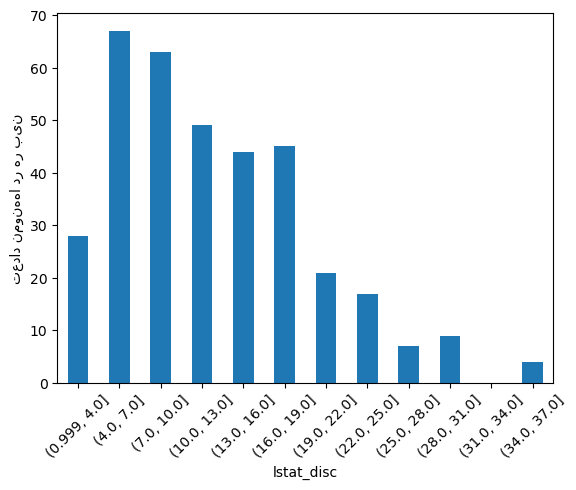

In [13]:
# رسم مشاهدات در هر دسته
x_train.groupby('lstat_disc')['lstat'].count().plot.bar()
plt.xticks(rotation=45)
plt.ylabel('تعداد نمونه‌ها در هر بین')